# Exercise 4 - Hilbert Transformation - Solution

<a id='task_Design_Non_Recursive_Filters'></a>
<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs)</strong><br>
    
After completing this Jupyter Notebook you should be able to:
    
<ul>
<li>Gain a better understanding of Hilbert Transformer properties and what they do
</li>
    <br>
     
    
<li>Establish the relationship between Fourier Transform and Hilbert Transform
</li>
    <br>
    
<li>Observe amplitude and impulse response of Hilbert Transformer filters
</li>
    <br>
    
<li>Visualise Hilbert transformer in zero-pole plane and correlates it with Linear Phase FIR filters
</li>
        <br>
 <li>understand basic use of functions from the <code>Python</code> libraries
<ul>
<li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html"><code>title()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>,
etc.)
</li>
<li><a href="https://numpy.org/"><code>Numpy</code></a> for mathematical functions and calculations like
<a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html"><code>array()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>real()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>imag()</code></a>, etc.
</li>
<li>Mostly used library for signal processing
<a href="https://docs.scipy.org/doc/scipy/reference/signal.html"><code>SciPy</code></a>
</li>
</ul>
</li>

</ul>
</div>

## Fundamentals

If the original signal  $x\left(t\right)$ is convoluted with $\left ( \frac{1}{\pi t} \right )$   

\begin{equation} \label{hilbert1} \tag{4.1}
 {\hat{x}\left(t\right)=x\left(t\right)*\left ( \frac{\mathrm{1}}{\mathit{\pi t}} \right )}   
\end{equation}

the signal $\hat{x}$ is resulting transformed signal. This convolution is called as Hilbert transformation.

As it can be seen from Eq. (\ref{hilbert1}) original signal is only shifted by $\pi$. Both signals are in the time-domain. Therefore, Hilbert transformation changes the phase of the original signal, however, it doesn't change the amplitude or content of the signal. 


### Connection of the Hilbert Transform with the Fourier Transform

Hilbert transformation fundamentally focuses on the analytic signal. As you remember, if an original signal undergoes Fast Fourier Transform (FFT), the resulting transformed signal is symmetric. It means that a signal has both negative and positive frequencies in a symmetric shape and they are complex-valued. In order to have a good spectral analysis, negative frequencies of the real-valued signal can be ignored since they are unneeded. In this way, positive frequencies are taken. These are called <strong>analytic signal</strong>. In signal processing, analytic signal is also be interpreted as a one-sided frequency, either positive or negative frequencies but not both. Generally, positive frequency is counted as one-sided.

When the original signal undergoes Fourier Transform (FT):

\begin{equation} \label{hilbert2} \tag{4.2}
{\hat{X}\left(\omega \right)}\mathrm{=}\ \mathit{- \ j}\:\mathrm{sgn}\left(\omega \right)\:X\left(\omega\right) 
\end{equation}

and since

\begin{equation} \label{hilbert3} \tag{4.3}
\mathrm{\mathit{\left | -\ j\:\mathrm{sgn}\left(\omega\right) \right |=\mathrm{1}}}
\end{equation}

it results in 

\begin{equation} \label{hilbert4} \tag{4.4}
{{\left | \hat{X}\left(\omega\right) \right |=\left | X\left(\omega\right)\right |}}   
\end{equation}
<br>
Hence Eq. (\ref{hilbert4}) implies that the magnitude of the original signal $x\left(t\right)$ and the resulting transformed signal $\hat{x}\left(t\right)$ is same.


Band-limited impulse response of the Hilbert transformer can be shown as:

\begin{equation}\label{GL5_4_10}  \tag{4.5}
h_{H}(t)=
\frac{1}{2\pi } \int\limits^{\omega _{A}/2}_{-\omega _{A}/2}
-j \, \mathrm{sgn}(\omega ) e^{j\omega t} d\omega
=\frac{1-\cos (\omega _{{A}}t/2)}{\pi t}\,.
\end{equation}



In this notebook, tasks are solved with an ideal frequency response which is defined as:
<br>

\begin{equation}   \tag{4.6}
H \left(e^{j\Omega} \right) = j\ \mathrm{sgn} \left(\Omega \right)
\end{equation}
<br>



## Libraries used in the Exercise 4

### Scipy

At the beginning, it's required to import relevant libraries into the code part. SciPy is mostly used library for signal processing since it has wide range of functions and implementations. That's why we initially <code>import scipy.signal as sig</code>. There are only three functions of <code>scipy.signal</code> to be used in this exercise:
<ol>
    <li><code>sig.remez(Lw, bands = , desired = , type = '')</code>: This function computes frequency response of the filter. The two values b, a from <code>b, a = sig.butter()</code> are used inside this function.</li>
    <li><code>sig.freqz(b, 1, a)</code>: This function computes frequency response of the filter. The two values b, a from <code>b, a = sig.butter()</code> are used inside this function.</li>
    <li><code>sig.tf2zpk(b3,1)</code>: This function returns representation of the zero-pole plane from transfer function. That's why it is called as <code>tf2zpk()</code>.</li>
    <li><code>sig.group_delay()</code>: This function calculates and returns the group delay of the digital filter. Values resulted from <code>remez()</code> function, $b3$, are put into this function with frequencies which is a total of $w = 512$ used as in the function <code>sig.group_delay((b3,512))</code>. </li>
    <li><code>sig.lfilter()</code>: This function filters the specified signal. It can be one of the types of IIR or FIR filter signals.</li>
    <li><code>sig.hilbert()</code>: This function computes the analytic signal which is transformed signal of hilbert transformation.</li>

</ol>

### Matplotlib.pyplot

Matplotlib is a powerful library to visualise intermadiate results of our codes. It enables us to make lots of changes on the figures. It's going to be used <code>as plt</code>. In this exercise, mostly used attributes of the plt are <code>plt.figure()</code>, <code>plt.subplot()</code>, <code>plt.plot()</code>, <code>plt.title('')</code>, <code>plt.xlabel('')</code>, <code>plt.ylabel('')</code>, <code>plt.axis()</code>, <code>plt.stem()</code>, <code>plt.legend()</code> and <code>plt.grid()</code>

<ol>
    <li><code>plt.figure()</code>: This function creates a figure, optionally with defining a size with the parameter <code>figsize = (x,y)</code>. In this exercise, the size of the figure are set to $x = 15$, $y = 4$ which means $15\ x \ 4$ inches. </li>
    <li><code>plt.subplot()</code>: This function divides the size we set in figsize into several parts. If we divide x-axis into two parts, for first graph it's shown as: <code>plt.subplot(1,2,1)</code>, for second graph it'shown as: <code>plt.subplot(1,2,2)</code>. So that, we can show two graphs fitted to the figsize. </li>  
    <li><code>plt.plot()</code>: The values to be plotted are specified inside the function. For example;<code>plt.plot(w3/np.pi, abs(h3))</code>. Here, There are two parameters that are $w3/np.pi$ and $abs(h3)$. First parameter, $w3/np.pi$, plots the normalised frequency while second parameter, $abs(h3)$, plots absolute values of the frequencies.</li>
    <li><code>plt.title('')</code>: As a string type, Title, is determined and written at the top the graph. For example; <code>plt.title('Poles and Zeros')</code></li>
    <li><code>plt.xlabel('')</code>: This function puts a label into the x-axis. For example; <code>plt.xlabel('Re{$z$}')</code></li>
    <li><code>plt.ylabel('')</code>: This function puts a label into the y-axis. For example; <code>plt.ylabel('Im{$z$}')</code></li>
    <li><code>plt.axis()</code>: This function provides us to set the limit of the x and y axis all together. For example; <code>plt.axis([0, 30, -0.8, 0.8])</code>. Here, x-axis ranges from $0$ to $30$ while y axis ranges from $-0.8$ to $0.8$.</li>
    <li><code>plt.grid()</code>: This function plots the auxiliary lines in a grid form. It has few parameters. For example; <code>plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')</code> in the zero-pole plane part.</li>
    <li><code>plt.stem()</code>: This function plots the lines in a stem form which is common to visualise discrete signals. </li>
</ol>

### Numpy

Numpy is the last library that needs to be used in the exercise. It's going to be imported <code>as np</code>. Then, we'll use it for math and calculations. In this exercise, some implementations of it is:

<ol>
    <li><code>np.array()</code>: This function creates an array. </li>
    <li><code>np.pi</code>: This attribute of numpy is equal to the $\pi$ </li>
    <li><code>np.real()</code>: This function returns the real component of the complex number. </li>
    <li><code>np.imag()</code>: This function returns the imaginary component of the complex number. </li>
    <li><code>np.arange()</code>: This function is used while determining interval with evenly spaced </li>
    <li><code>np.sin()</code>: This function creates the sinusoidal signal. </li>
    <li><code>np.zeros()</code>: This function forms zeros. </li>
    <li><code>np.concatenate()</code>: This function returns The concatenated array. </li>
    <li><code>np.int64</code>: This attribute of numpy states the data type which is $64$-bit $integer$. </li>
   
</ol>

<div class="alert alert-block alert-info">
    <strong><h3>Task 1: Design of a Hilbert Transformation</h3></strong><br>
   <br>
<ul>
    <li>
    a) Plot the two Hilbert transformers' amplitude response and impulse response of order $m = 30$ and $m = 31$. You can make use of <code>remez()</code> function in SciPy. Identify which transformator refers to which class of FIR filters. 
       <br>
       <br>
    <strong>HINT:</strong>  If you use remez() function, the parameter must be <code>'type = hilbert'</code>  
    </li>

</ul>
</div>

First, it is needed to add those libraries into the cell below.

In [2]:
#LIBRARIES

import scipy.signal as sig           #signal processing library
import numpy as np                   #numpy library for math
import matplotlib.pyplot as plt      #plotting 

According to specified parameters given in the Question notebook, relevant initialisations need to be added into the cell.

In [12]:
#INITIALISATON

order = 30                           #filter order m
Lw = order + 1                       #(m+1)th order for filter functions
f1 = np.array([0.025 , 0.475])       #band edges array
m1 = np.array([1])                   #desired gain 
f2 = np.array([0.025 , 0.5])         #band edges array
m2 = np.array([1])                   #desired gain

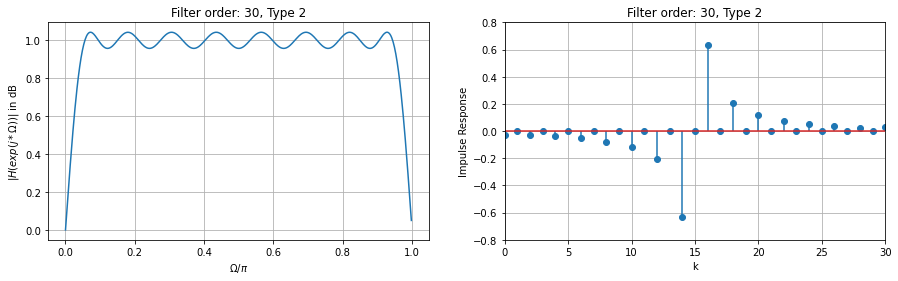

In [4]:
#AMPLITUDE AND IMPULSE RESPONSE

b3 = sig.remez(Lw, bands = f1, desired = m1, type = 'hilbert')  #calculate the minimax optimal filter with remez function

w3,h3 = sig.freqz(b3,1,512)                             #compute the frequency response of a digital filter.

plt.figure(figsize=(15,4))                              #set the size of the figure

plt.subplot(1,2,1)                                      #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w3/np.pi, abs(h3))                             #plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")                #absolute value of the spectrum in dB 
plt.xlabel("$\Omega/\pi$")                              #Omega/pi 
#plt.axis([0, 1, 0, 1])
plt.title("Filter order: " + str(Lw-1) + ", Type 2")    #put title of the figure            
plt.grid()                                              #configure the grid lines

plt.subplot(1,2,2)                                      #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(-b3, use_line_collection=True)                 #plot the impulse response
plt.ylabel("Impulse Response")                          #put the name of y label
plt.xlabel("k")                                         #put the name of x label
plt.axis([0, 30, -0.8, 0.8])                            #set x and y axis
plt.title("Filter order: " + str(Lw-1) + ", Type 2")    #put title of the figure
plt.grid()                                              #configure the grid lines




<div class="alert alert-block alert-warning">
    <ol>
        <li>The amplitude response graph of the filter is a bandpass filter with a given band edges array $[0.025 , 0.475]$ and desired gain array $[1.0]$ </li>
        <br>
        <li>The impulse response graph of the filter is anti-symmetric and centre coefficient $c = 0$. Therefore this filter is also called as a Type 2 Linear Phase FIR Filter with even order $m = 30$.</li>
        <br>
        <li>The odd coefficients are $0$</li>
        <br>
        <li>As you move from the $k = 16$ to the $k = 30$, the values get closer to $0$ same as going from $k = 14$ to $k = 0$ due to the anti-symmetry.</li>
    </ol>
</div>

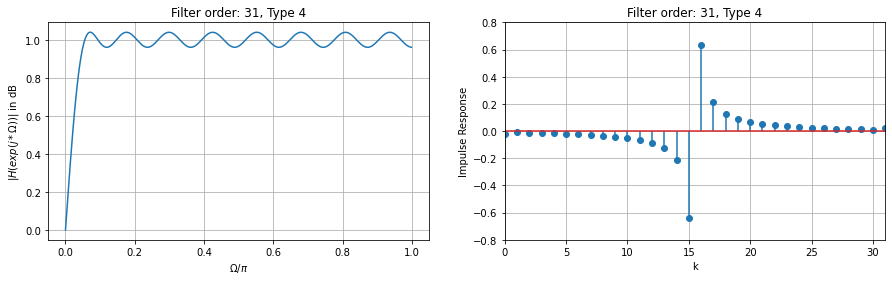

In [5]:
b4 = sig.remez(Lw+1, bands = f2, desired = m2, type = 'hilbert') #calculate the minimax optimal filter with remez function 
w4,h4 = sig.freqz(b4,1,512)                          #compute the frequency response of a digital filter.

plt.figure(figsize=(15,4))                           #set the size of the figure
 
plt.subplot(1,2,1)                                   #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w4/np.pi,  abs(h4))                         #plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")             #absolute value of the spectrum in dB
plt.xlabel("$\Omega/\pi$")                           #Omega/pi
#plt.axis([0, 1, 0, 1])
plt.title("Filter order: " + str(Lw) + ", Type 4")   #put title of the figure
plt.grid()                                           #configure the grid lines

plt.subplot(1,2,2)                                   #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(-b4, use_line_collection=True)              #Plot the impulse response
plt.ylabel("Impulse Response")                       #put the name of y label
plt.xlabel("k")                                      #put the name of x label
plt.axis([0, 31, -0.8, 0.8])                         #set x and y axis
plt.title("Filter order: " + str(Lw) + ", Type 4")   #put title of the figure
plt.grid()                                           #configure the grid lines


<div class="alert alert-block alert-warning">
    <ol>
        <li>The amplitude response graph of the filter is a filter with a given band edges array $[0.025 , 0.5]$ and desired gain array $[1.0]$</li>
        <br>
        <li>The impulse response graph of the filter is anti-symmetric and centre coefficient $c\ne0$. Therefore this filter is also called as a Type 4 Linear Phase FIR Filter with odd order $m = 31$.</li>
        <br>
        <li>As you move from the $k = 16$ to the $k = 31$, the values get closer to $0$ same as going from $k = 15$ to $k = 0$ due to the anti-symmetry.</li>
    </ol>
</div>

<div class="alert alert-block alert-info">
    <strong><h3>Task 2: Pole-Zero plane and Group delay</h3></strong><br>
   <br>
<ul>
    <li>
    a) Plot the pole-zero plane for hilbert transformer of order $m = 30$  asked in the Task 1.a and comment the result.
    </li>
    <br>
     <li>
    b) Calculate the group delay of order $m = 30$ and plot it. 
    </li>

</ul>
</div>

In [6]:
#Zero-pole plane function

def zplane(z,p, title='Poles and Zeros'):     
    
    ax = plt.gca()

    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms=10)  #zeros on the plane
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms=10)  #poles on the plane
    unit_circle = plt.Circle((0, 0), radius=1, fill=False,          #creating unit circle r = 1
                             color='black', ls='--', alpha=0.9)
    ax.add_patch(unit_circle)

    plt.title(title)            #put title of the figure
    plt.xlabel('Re{$z$}')       #put the name of x label              
    plt.ylabel('Im{$z$}')       #put the name of y label
    plt.axis('equal')          

array([ 3.19134813e-02, -1.52472240e-15,  2.60405057e-02,  1.01637033e-15,
        3.73258559e-02, -2.18930356e-17,  5.31148398e-02,  5.62847002e-16,
        7.67096270e-02,  3.00361244e-17,  1.16853447e-01,  1.32932019e-16,
        2.05801660e-01,  2.08202084e-16,  6.34504578e-01,  0.00000000e+00,
       -6.34504578e-01, -2.08202084e-16, -2.05801660e-01, -1.32932019e-16,
       -1.16853447e-01, -3.00361244e-17, -7.67096270e-02, -5.62847002e-16,
       -5.31148398e-02,  2.18930356e-17, -3.73258559e-02, -1.01637033e-15,
       -2.60405057e-02,  1.52472240e-15, -3.19134813e-02])

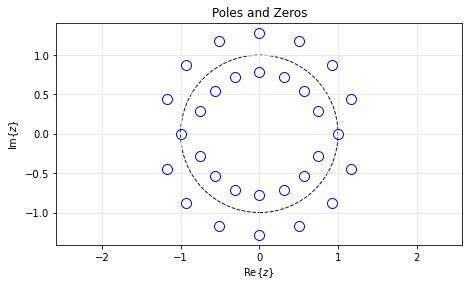

In [7]:
#ZERO-POLE PLANE 

b3 = sig.remez(Lw, bands = f1, desired = m1, type = 'hilbert')  #calculate the minimax optimal filter with remez function
z, p, k = sig.tf2zpk(b3,1)       #transfer function to zero pole plane
plt.figure(figsize=(16, 9))      #set the size of the figure
plt.subplot(2, 2, 1)
zplane(z,p)                      #calling the function
plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')  #configure the grid lines

b3


<div class="alert alert-block alert-warning" > 
Pero-zole plane is a good visualisation to see the locations of zeros and poles resulted from the transfer function of the system. It shows us to determine whether the filter is Finite Impulse Response (FIR) or Infinite Impulse Response (IIR). If zero-pole plane has only zeros, it's called as a Finite Impulse Response (FIR) filters. Infinite Impulse Response (IIR) filter has both zeros and poles. As you can see from the figure, it's a FIR system of Hilbert transformer that contains only $30$ zeros. Since the system is non-recursive and linear, $15$ zeros are reflected as a pair.  
<div>

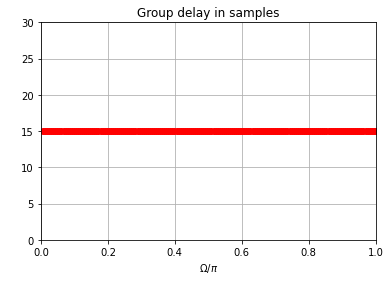

In [8]:
#GROUP DELAY

w, h = sig.group_delay((b3,512))   #calculate the group delay of order m = 30

plt.plot(w,h, 'or')                #plot the delay

plt.xlabel('$\Omega/\pi$')         #Omega/pi
plt.ylabel(' ')

plt.axis([0, 1, 0, 30])            #set x and y axis
plt.title('Group delay in samples')#put title of the figure
plt.grid()                         #configure the grid lines


<div class="alert alert-block alert-warning" >

In order to use a Hilbert transformer to produce analytic signals, the output signal (imaginary part) and the input signal (real part) must be delayed equally and must be combined. This means, that an even number group delay should exist. By a non recursive, linear system, the contribution of every zero to group delay is -0.5. Therefore, in the case of Hilbert transformer, an even filter order must exist. This is a contradiction to achieve a high approximation quality. As you see in the graph, group delay $\tau_g(\Omega)$  of the Hilbert transformer is the half of even filter order $m = 30$. So, the group delay is calculated as $15$
    
 <div> 

<div class="alert alert-block alert-info">
    <strong><h3>Task 3: Input and Output signals </h3></strong><br>
   <br>
<ul>
    <li>
    a) Create a signal that has:
        <ul>
            <li>frequency of $50$ $Hz$</li>
            <li>duration of two seconds</li>
            <li>sampling frequency $f_s = 1000.0$</li>
        </ul>
        <br>
        Then, use Hilbert transformer of order $m = 30$ to filter this signal. Plot input and output signals. <strong>HINT:</strong> You should take group delay into consideration plotting the signals since output signal is delayed.  
    </li>
    <br>
     <li>
    b)  Plot the time-domain of original signal and the hilbert transformation signal. <strong>HINT:</strong> You can use <code>hilbert()</code> function in SciPy.
    </li>

</ul>
</div>

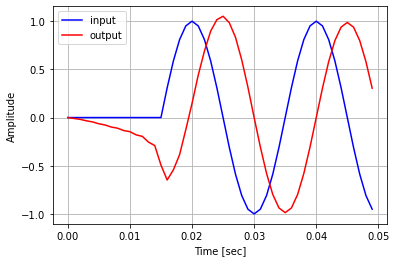

In [9]:
#TASK 3.a 
#Design of the signals

b3 =  sig.remez(Lw, bands = f1, desired = m1, type = 'hilbert') #calculate the minimax optimal filter with remez function
duration = 2.0                         #2 seconds
fs = 1000.0                            #sampling frequency
t = np.arange(0, duration, 1/fs)       #define time
x = np.sin(2 * np.pi* 50 * t )         #create the sinusoidal signal
xh = sig.lfilter((-1 * b3), 1, x)      #filter the signal 
h = np.zeros(15, dtype = np.int64)     #form zeros (take group delay into account)
xd = np.concatenate((h, x), axis=None) #delay 15 samples  => adding zeros at the beginning of the signal x 


plt.plot(t[0:50], xd[0:50], 'b', label ='input') #plot input in the blue colour  
plt.plot(t[0:50], xh[0:50], 'r', label= 'output')#plot output in the red colour
plt.xlabel('Time [sec]')               #put the name of x label
plt.ylabel('Amplitude')                #put the name of y label
#plt.axis([0, 1, -150, 0])

plt.grid()                             #configure the grid lines
plt.legend()                           #describe elements of the graph




<div class = "alert alert-block alert-warning">
If we take the group delay into account in describing the signal, we will get a delay at the value $15$ with a filter order of $m = 30$, according to the Task 1.a. The plot portrayed here verifies the relation $-cos(x) = H{sin(x)}$ of a sinusoidal series with the Hilbert transform.
<div>

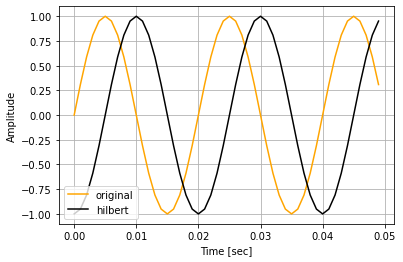

In [10]:
#TASK 3.b 
 
y = sig.hilbert(x)            #compute the analytic signal, using the Hilbert transform. y = analytic signal of x
plt.plot(t[0:50], y.real[0:50], 'orange',label ='original') #real part of y is equal to x
plt.plot(t[0:50], y.imag[0:50], 'black', label= 'hilbert')  #imaginary part of y is hilbert transform of x
plt.xlabel('Time [sec]')      #put the name of x label
plt.ylabel('Amplitude')       #put the name of y label
plt.grid()                    #configure the grid lines
plt.legend()                  #describe elements of the graph
 

<div class="alert alert-block alert-warning" >
This is the time-amplitude graph of the original signal and its Hilbert transform. If you look at the definition of the Hilbert teansformation above, you can see that there is no change with respect to amplitude and content compared to original signal. Only the phase of the signal changes. As a result, domain of the signal doesn't change.
</div>

## References

[[GA46]](https://digital-library.theiet.org/content/journals/10.1049/ji-3-2.1946.0074) D. Gabor, “Theory of communications”, Journal of the Inst. Electr. Eng., vol. 93, pt. 111, pp. 42-57, 1946

[[VIL48]](https://archive.org/details/VilleSigAnalytiqueCablesEtTrans1948Fr) J. A. Ville, “Theorie et application de la notion du signal analytique”,